# Albedo and heat redistribution efficiency


**Author:** Hannu Parviainen<br>
**Last edited:** 11.8.2022

Here we estimate the allowed ranges for KELT-1b Bond albedo and heat redistribution efficiency given the $E_\star$ estimate of 0.22 &pm; 0.08 from atmospheric modelling carried out in the paper Sect. 6.4. Further constraints are given by the upper limit of 1900 K for the nightside brightness temperature.

The nightside temperature equation is Eq. 15 from [Morris 2022](https://www.aanda.org/10.1051/0004-6361/202142135).


In [1]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [124]:
import seaborn as sb
from uncertainties import ufloat
from src.kelt1 import star_teff, AAOCW

def estar(ab, eps):
    return (1-ab) * (2/3 - 5*eps/12)

def irradiation_temperature(tstar, sma):
    return tstar * sqrt(1 / sma)

def nightside_temperature(ti, ab, eps):
    return ti * (1-ab)**0.25 * (eps / 4)**0.25

sma = 3.5297  # Scaled semimajor axis
eso = ufloat(0.22, 0.08)  # Measured E_star

In [119]:
nab, neps = 150, 150
ab, eps = meshgrid(linspace(0, 1, nab), linspace(0, 1, neps))

In [120]:
es = estar(ab, eps)
ti = irradiation_temperature(star_teff.n, sma)
tnight = nightside_temperature(ti, ab, eps)

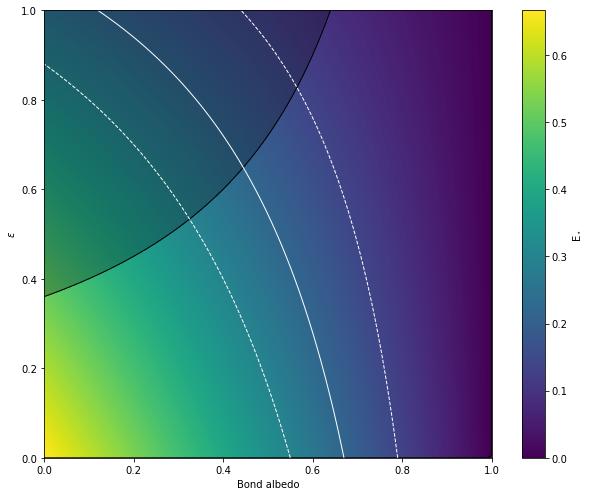

In [200]:
fig, ax = subplots(figsize=(9,7))
im = ax.imshow(es, origin='lower', extent=(0, 1, 0, 1))
ax.contourf(tnight, extent=(0, 1, 0, 1), levels=(1900, 5000), alpha=0.25, colors='k')
ax.contour(tnight, extent=(0, 1, 0, 1), levels=(0, 1900), colors='k', linewidths=1)
ax.contour(es, extent=(0, 1, 0, 1), levels=[eso.n-eso.s, eso.n, eso.n+eso.s], 
           colors='w', linewidths=1, linestyles=['--', '-', '--'])
fig.colorbar(im, label='E$_\star$')
setp(ax, xlabel='Bond albedo', ylabel='$\epsilon$')
fig.tight_layout()

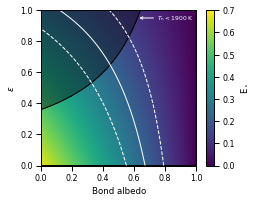

In [196]:
with sb.plotting_context('paper', font_scale=0.9):
    fig, ax = subplots(figsize=(AAOCW, 0.75*AAOCW))
    im = ax.imshow(es, origin='lower', extent=(0, 1, 0, 1), vmax=0.7)
    ax.contourf(tnight, extent=(0, 1, 0, 1), levels=(1900, 5000), alpha=0.4, colors='k')
    ax.contour(tnight, extent=(0, 1, 0, 1), levels=(0, 1900), colors='k', linewidths=1)
    ax.contour(es, extent=(0, 1, 0, 1), levels=[eso.n-eso.s, eso.n, eso.n+eso.s], 
               colors='w', linewidths=1, linestyles=['--', '-', '--'])
    ax.annotate('$T_\mathrm{n} < 1900$ K', (0.62, 0.95), xytext=(0.75, 0.95), size='x-small', va='center', c='w',
                arrowprops=dict(arrowstyle="->", connectionstyle="arc3", lw=1, ec='w'))

    fig.colorbar(im, ax=ax, label='E$_\star$')
    setp(ax, xlabel='Bond albedo', ylabel='$\epsilon$')
    fig.tight_layout()
    fig.subplots_adjust(bottom=0.15, top=0.98, left=0.14, right=0.95)
    fig.savefig('plots/albedo_vs_epsilon.pdf')

---

<center>&copy;2022 Hannu Parviainen</center>